---
**License**

 TestInterp

 Mon Jan 25 20:56:00 2020\
 Copyright  2021\
 Eduardo ...\
 Sandro Dias Pinto Vitenti <vitenti@uel.br>

---
---

 TestInterp\
 Copyright (C) 2021 Eduardo ...\
 Copyright (C) 2021 Sandro Dias Pinto Vitenti <vitenti@uel.br>


 numcosmo is free software: you can redistribute it and/or modify it
 under the terms of the GNU General Public License as published by the
 Free Software Foundation, either version 3 of the License, or
 (at your option) any later version.

 numcosmo is distributed in the hope that it will be useful, but
 WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
 See the GNU General Public License for more details.

 You should have received a copy of the GNU General Public License along
 with this program.  If not, see <http://www.gnu.org/licenses/>.
 
---

In [1]:
try:
  import gi
  gi.require_version('NumCosmo', '1.0')
  gi.require_version('NumCosmoMath', '1.0')
except:
  pass

import sys
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from scipy.optimize import minimize

from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm
%matplotlib inline

In [2]:
__name__ = "NcContext"

Ncm.cfg_init ()
Ncm.cfg_set_log_handler (lambda msg: sys.stdout.write (msg) and sys.stdout.flush ())

In [3]:
dim = 2
p = np.random.random_sample((dim,))
print (p)

[0.22943106 0.00582551]


In [4]:
rng = Ncm.RNG.new (None)

fmodel = Ncm.ModelMVND.new (dim)
fdata = Ncm.DataGaussCovMVND.new_full (dim, 0.1, 0.4, 10.0, -1.0, 1.0, rng)

fdata.props.use_norma = True

mset = Ncm.MSet.new_array ([fmodel])
mset.param_set_all_ftype (Ncm.ParamType.FREE)
mset.prepare_fparam_map ()

mset.fparams_set_array (p)
mset.pretty_log ()

#----------------------------------------------------------------------------------
# Model[00000]:
#   - NcmModelMVND : MVND
#----------------------------------------------------------------------------------
# Model parameters
#   - mu_0[00]:  0.229431056760732   [FREE]
#   - mu_1[01]:  0.00582551298168887 [FREE]


In [5]:
y_a = []
x_a = []
xn_a = []

#interp = Ncm.StatsDistNdKDEStudentt.new (len (p), Ncm.StatsDistNdCV.NONE, 5.0)
interp = Ncm.StatsDistNdKDEGauss.new (len (p), Ncm.StatsDistNdCV.NONE)
nps = 100

for a in range (nps):
    v, N = fdata.gen (mset, None, None, rng)
    interp.add_obs (v)
    y_a.append (fdata.m2lnL_val (mset))
    x_a.append (v.dup_array ())

for a in range (nps):
    v, N = fdata.gen (mset, None, None, rng)
    xn_a.append (v.dup_array ())

y_a = np.array (y_a)
x_a = np.array (x_a)
xn_a = np.array (xn_a)

fdata.y.set_array (p)

fdata.m2lnL_val (mset)

-0.48227804757909415

In [6]:
"""
def calib (val):
    interp.set_over_smooth (val)
    interp.prepare_interp (Ncm.Vector.new_array (y_a))
    
    return interp.get_rnorm ()
    
    yi_a = []
    ya_a = []
    yi_b = []

    for x in xn_a:
        mset.fparams_set_array (x)
        fdata.prepare (mset)
        yi_a.append (interp.eval_m2lnp (Ncm.Vector.new_array (x)))
        ya_a.append (fdata.m2lnL_val (mset))

    yi_a = np.array (yi_a)
    ya_a = np.array (ya_a)
        
    m = -np.average (yi_a - ya_a, weights = 1.0 / ya_a**2)

    diff = (yi_a + m) / ya_a - 1.0
    
    return np.sum(diff**2)/len(diff)

calib_os = minimize (calib, 2.17, method='Nelder-Mead', tol=1.0e-11, options = {'maxiter': 1e8, 'xatol': 1.0e-7, 'fatol': 1.0e-7})
"""

interp.set_cv_type (Ncm.StatsDistNdCV.SPLIT)
interp.prepare_interp (Ncm.Vector.new_array (y_a))
interp.set_cv_type (Ncm.StatsDistNdCV.NONE)

calib_os = interp.get_over_smooth ()

print (interp.get_rnorm (), calib_os)



ret0 0
ret2 0
ret2 0
ret2 0
ret1 0
ret2 0
ret2 0
added 5 lrnorm     0.0342788712018249 rnorm     0.0314547783036635
ret1 0
added 1 lrnorm      0.031174290032189 rnorm     0.0314547783036635
ret1 0
ret2 0
ret2 0
added 5 lrnorm      0.031980882433976 rnorm      0.031174290032189
ret1 0
ret2 0
added 1 lrnorm     0.0302324972587288 rnorm      0.031174290032189
ret1 0
ret2 0
ret2 0
added 4 lrnorm     0.0222887819745982 rnorm     0.0302324972587288
ret1 0
ret2 0
added 3 lrnorm     0.0206695069617852 rnorm     0.0222887819745982
ret1 0
ret2 0
added 3 lrnorm     0.0200514977689874 rnorm     0.0206695069617852
ret1 0
ret2 0
ret2 0
added 3 lrnorm     0.0190778670085133 rnorm     0.0200514977689874
ret1 0
ret2 0
ret2 0
added 2 lrnorm     0.0167348079372879 rnorm     0.0190778670085133
ret1 0
ret2 0
added 2 lrnorm     0.0166085430454574 rnorm     0.0167348079372879
ret1 0
added 1 lrnorm     0.0165740201179669 rnorm     0.0166085430454574
ret1 0
added 1 lrnorm     0.0165572948425645 rnorm     0.016

ret1 0
ret2 0
ret2 0
ret2 0
added 6 lrnorm    0.00252291689003386 rnorm    0.00119068747858733
ret1 0
added 1 lrnorm    0.00118470908606747 rnorm    0.00119068747858733
ret1 0
ret2 0
added 4 lrnorm    0.00103986274937529 rnorm    0.00118470908606747
ret1 0
ret2 0
ret2 0
added 3 lrnorm   0.000800718267973916 rnorm    0.00103986274937529
ret1 0
ret2 0
ret2 0
added 3 lrnorm   0.000752804487264664 rnorm   0.000800718267973916
ret1 0
ret2 0
added 4 lrnorm   0.000623672809757814 rnorm   0.000752804487264664
ret1 0
ret2 0
added 4 lrnorm   0.000588520034810258 rnorm   0.000623672809757814
ret1 0
ret2 0
added 3 lrnorm   0.000542934954295616 rnorm   0.000588520034810258
ret1 0
ret2 0
added 4 lrnorm   0.000538164567425924 rnorm   0.000542934954295616
ret1 0
ret2 0
added 2 lrnorm   0.000537564728658405 rnorm   0.000538164567425924
ret1 0
ret2 0
ret2 0
ret2 0
ret2 0
added 2 lrnorm   0.000709412972557479 rnorm   0.000537564728658405
ret1 0
ret2 0
added 1 lrnorm    0.00053557633151793 rnorm   0.00053

ret1 0
added 1 lrnorm   0.000151229452779686 rnorm   0.000151229645081631
OS:       1.80911730638184, RNORM:   0.000151229452779686 :   0.000151229452779686
b_dup stride: 1
ret00 0
ret2 0
ret2 0
ret2 0
ret2 0
ret2 0
ret1 0
ret2 0
ret2 0
ret2 0
added 5 lrnorm     0.0384218306425883 rnorm     0.0648013743939166
ret1 0
ret2 0
ret2 0
ret2 0
added 8 lrnorm     0.0329591855466458 rnorm     0.0384218306425883
ret1 0
ret2 0
ret2 0
added 5 lrnorm     0.0282937110249748 rnorm     0.0329591855466458
ret1 0
ret2 0
added 4 lrnorm     0.0145562501092118 rnorm     0.0282937110249748
ret1 0
ret2 0
ret2 0
ret2 0
added 7 lrnorm     0.0105386503640482 rnorm     0.0145562501092118
ret1 0
ret2 0
ret2 0
added 8 lrnorm    0.00864238149647573 rnorm     0.0105386503640482
ret1 0
ret2 0
ret2 0
added 7 lrnorm    0.00776169167676717 rnorm    0.00864238149647573
ret1 0
ret2 0
ret2 0
ret2 0
added 6 lrnorm    0.00779379285464731 rnorm    0.00776169167676717
ret1 0
added 1 lrnorm    0.00719089616775568 rnorm    0.007

In [7]:
print (calib_os)

1.8091176514436176


ret0 0
ret2 0
OS:                    0.1, RNORM:       2.08027910465715 :       2.08027910465715
ret0 0
ret2 0
OS:      0.103532184329566, RNORM:       2.06249547319098 :       2.06249547319098
ret0 0
ret2 0
OS:      0.107189131920513, RNORM:       2.04308746928422 :       2.04308746928422
ret0 0
ret2 0
OS:      0.110975249641207, RNORM:       2.02204419455712 :       2.02204419455712
ret0 0
ret2 0
OS:      0.114895100018731, RNORM:       1.99940291399005 :       1.99940291399005
ret0 0
ret2 0
OS:      0.118953406737032, RNORM:       1.97518544241832 :       1.97518544241832
ret0 0
ret2 0
OS:      0.123155060329283, RNORM:       1.94941697200213 :       1.94941697200213
ret0 0
ret2 0
OS:      0.127505124071301, RNORM:       1.92213730260475 :       1.92213730260475
ret0 0
ret2 0
OS:      0.132008840083142, RNORM:       1.89339732227172 :       1.89339732227172
ret0 0
ret2 0
OS:      0.136671635646201, RNORM:       1.86325445108219 :       1.86325445108219
ret0 0
ret2 0
OS:      0.14149

added 6 lrnorm    0.00412512539173836 rnorm    0.00450840085154643
ret1 0
ret2 0
ret2 0
added 3 lrnorm    0.00404882686794823 rnorm    0.00412512539173836
ret1 0
ret2 0
ret2 0
added 4 lrnorm    0.00380941101413181 rnorm    0.00404882686794823
ret1 0
ret2 0
added 4 lrnorm    0.00379101815960356 rnorm    0.00380941101413181
ret1 0
ret2 0
ret2 0
added 6 lrnorm    0.00377071435222164 rnorm    0.00379101815960356
ret1 0
ret2 0
ret2 0
added 4 lrnorm    0.00353357558772014 rnorm    0.00377071435222164
ret1 0
ret2 0
added 3 lrnorm    0.00350356172338182 rnorm    0.00353357558772014
ret1 0
added 2 lrnorm    0.00349019373594398 rnorm    0.00350356172338182
ret1 0
ret2 0
ret2 0
ret2 0
added 3 lrnorm    0.00340167864318034 rnorm    0.00349019373594398
ret1 0
ret2 0
added 3 lrnorm    0.00336619767455687 rnorm    0.00340167864318034
ret1 0
ret2 0
added 3 lrnorm     0.0032324970210582 rnorm    0.00336619767455687
ret1 0
ret2 0
ret2 0
added 2 lrnorm    0.00320353821704343 rnorm     0.0032324970210582


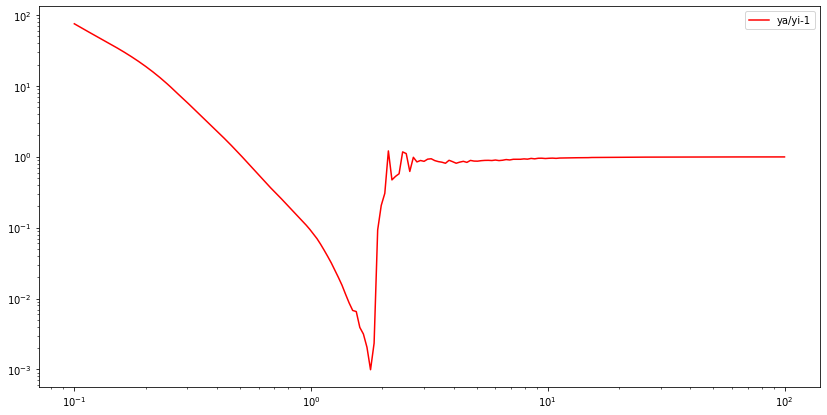

In [8]:
l_a = []
f_a = []
g_a = []
h_a = []

for l in np.geomspace (1.0e-1, 1.0e2, 200):
    interp.set_over_smooth (l)
    interp.prepare_interp (Ncm.Vector.new_array (y_a))
    yi_a = []
    ya_a = []
    yi_b = []

    for x in xn_a:
        mset.fparams_set_array (x)
        fdata.prepare (mset)
        yi_a.append (interp.eval_m2lnp (Ncm.Vector.new_array (x)))
        ya_a.append (fdata.m2lnL_val (mset))

    yi_a = np.array (yi_a)
    ya_a = np.array (ya_a)

    m = -np.average (yi_a - ya_a, weights = 1.0 / ya_a**2)
    diff = (yi_a + m) / ya_a - 1.0
    diff2 = (yi_a + m) - ya_a
    
    l_a.append (l)
    f_a.append (np.sqrt (np.sum (diff2**2)/len(diff2)))
    g_a.append (np.sqrt (np.sum (diff **2)/len(diff )))


plt.figure (figsize=(14, 7))
#plt.plot (l_a, f_a, 'b-', label='ya-yi')
plt.plot (l_a, g_a, 'r-', label='ya/yi-1')
plt.legend(loc='best')

plt.xscale ('log')
plt.yscale ('log')


In [9]:
#interp.prepare ()
interp.set_over_smooth (calib_os)
#interp.set_over_smooth (1.0e-10)
interp.prepare_interp (Ncm.Vector.new_array (y_a))

b_dup stride: 1
ret00 0
ret2 0
ret2 0
ret2 0
ret2 0
ret2 0
ret1 0
ret2 0
ret2 0
ret2 0
added 5 lrnorm     0.0384223582525987 rnorm     0.0648007615380224
ret1 0
ret2 0
ret2 0
ret2 0
added 8 lrnorm     0.0329584234989832 rnorm     0.0384223582525987
ret1 0
ret2 0
ret2 0
added 5 lrnorm     0.0282926755594769 rnorm     0.0329584234989832
ret1 0
ret2 0
added 4 lrnorm     0.0145563333211417 rnorm     0.0282926755594769
ret1 0
ret2 0
ret2 0
ret2 0
added 7 lrnorm       0.01053907830625 rnorm     0.0145563333211417
ret1 0
ret2 0
ret2 0
added 8 lrnorm    0.00864245131570737 rnorm       0.01053907830625
ret1 0
ret2 0
ret2 0
added 7 lrnorm    0.00776180321674862 rnorm    0.00864245131570737
ret1 0
ret2 0
ret2 0
ret2 0
added 6 lrnorm     0.0077937672880888 rnorm    0.00776180321674862
ret1 0
added 1 lrnorm    0.00735029893070266 rnorm    0.00776180321674862
ret1 0
ret2 0
ret2 0
ret2 0
added 6 lrnorm     0.0112453389403968 rnorm    0.00735029893070266
ret1 0
added 1 lrnorm    0.00701768961360266 rn

m:  0.6855517118726746
4.6e-04
5.6e-05
0.55


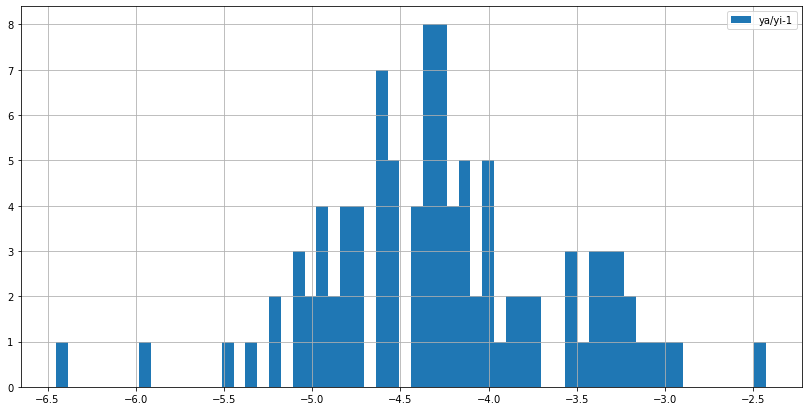

In [10]:
       
yi_a = []
ya_a = []
yi_b = []

for x in xn_a:
    mset.fparams_set_array (x)
    fdata.prepare (mset)
    yi_a.append (interp.eval_m2lnp (Ncm.Vector.new_array (x)))
    ya_a.append (fdata.m2lnL_val (mset))

yi_a = np.array (yi_a)
ya_a = np.array (ya_a)

m = -np.average (yi_a - ya_a, weights = 1.0 / ya_a**2)
print ("m: ", m)
diff = (yi_a + m) / ya_a - 1.0
diff2 = (yi_a + m) - ya_a

norm, cont = scipy.stats.mode (diff)
plt.figure (figsize=(14, 7))

bla = plt.hist(np.log10 (np.abs(diff )), bins = 60, label='ya/yi-1')
#bla = plt.hist(np.log10 (np.abs(diff2)), bins = 60, label='ya-yi')
#bla = plt.hist(ya_a,     bins = 60, label='ya')
#bla = plt.hist(yi_a + m, bins = 60, label='yi')
#plt.yscale ('log')
plt.grid ()
plt.legend(loc='best')

mean_err = 10**(np.mean (np.log10 (np.abs (diff))))

print ("%.1e" % (np.sqrt (np.sum(diff**2)/len(diff))))
print ("%.1e" % (mean_err))
print (sum(np.abs ((yi_a + m) / ya_a - 1.0) < mean_err)/len(ya_a))

#print (yi_a+m-ya_a)

#print (sum (np.abs((yi_a+m)/ya_a-1.0) < 1.0e-7)/len(ya_a))


ret0 0
ret2 0
OS:                    0.1, RNORM:       2.08027910465715 :       2.08027910465715
ret0 0
ret2 0
OS:      0.103532184329566, RNORM:       2.06249547319098 :       2.06249547319098
ret0 0
ret2 0
OS:      0.107189131920513, RNORM:       2.04308746928422 :       2.04308746928422
ret0 0
ret2 0
OS:      0.110975249641207, RNORM:       2.02204419455712 :       2.02204419455712
ret0 0
ret2 0
OS:      0.114895100018731, RNORM:       1.99940291399005 :       1.99940291399005
ret0 0
ret2 0
OS:      0.118953406737032, RNORM:       1.97518544241832 :       1.97518544241832
ret0 0
ret2 0
OS:      0.123155060329283, RNORM:       1.94941697200213 :       1.94941697200213
ret0 0
ret2 0
OS:      0.127505124071301, RNORM:       1.92213730260475 :       1.92213730260475
ret0 0
ret2 0
OS:      0.132008840083142, RNORM:       1.89339732227172 :       1.89339732227172
ret0 0
ret2 0
OS:      0.136671635646201, RNORM:       1.86325445108219 :       1.86325445108219
ret0 0
ret2 0
OS:      0.14149

ret2 0
added 9 lrnorm     0.0872735831673636 rnorm      0.123353131453864
ret1 0
ret2 0
added 7 lrnorm     0.0590193052887169 rnorm     0.0872735831673636
ret1 0
ret2 0
added 6 lrnorm     0.0352141704248463 rnorm     0.0590193052887169
ret1 0
ret2 0
added 6 lrnorm     0.0317547468174806 rnorm     0.0352141704248463
ret1 0
ret2 0
ret2 0
added 5 lrnorm     0.0280344467309028 rnorm     0.0317547468174806
ret1 0
ret2 0
added 5 lrnorm     0.0161992491580348 rnorm     0.0280344467309028
ret1 0
ret2 0
added 5 lrnorm     0.0140554694874546 rnorm     0.0161992491580348
ret1 0
ret2 0
ret2 0
added 5 lrnorm     0.0129476551608198 rnorm     0.0140554694874546
ret1 0
ret2 0
added 4 lrnorm     0.0116056177648928 rnorm     0.0129476551608198
ret1 0
ret2 0
added 3 lrnorm     0.0110465866128802 rnorm     0.0116056177648928
ret1 0
added 4 lrnorm     0.0108800778128799 rnorm     0.0110465866128802
ret1 0
ret2 0
ret2 0
ret2 0
added 3 lrnorm     0.0110635535952466 rnorm     0.0108800778128799
ret1 0
added 1

ret00 0
ret2 11
OS:       35.2970730273065, RNORM:       23935.8872129843 :       23935.8872129843
b_dup stride: 1
ret00 0
ret2 7
OS:       36.5438307095725, RNORM:       22940.1711902756 :       22940.1711902756
b_dup stride: 1
ret00 0
ret2 7
OS:       37.8346261713193, RNORM:        27045.401482762 :        27045.401482762
b_dup stride: 1
ret00 0
ret2 9
OS:       39.1710149080926, RNORM:       21447.3650006012 :       21447.3650006012
b_dup stride: 1
ret00 0
ret2 8
OS:       40.5546073584083, RNORM:       23000.0125114357 :       23000.0125114357
b_dup stride: 1
ret00 0
ret2 6
OS:       41.9870708444391, RNORM:       24041.2042537497 :       24041.2042537497
b_dup stride: 1
ret00 0
ret2 8
OS:       43.4701315812502, RNORM:       25585.3652563549 :       25585.3652563549
b_dup stride: 1
ret00 0
ret2 9
OS:        45.005576757005, RNORM:       21504.8038975789 :       21504.8038975789
b_dup stride: 1
ret00 0
ret2 7
OS:       46.5952566866468, RNORM:       22545.8933707031 :       22545.

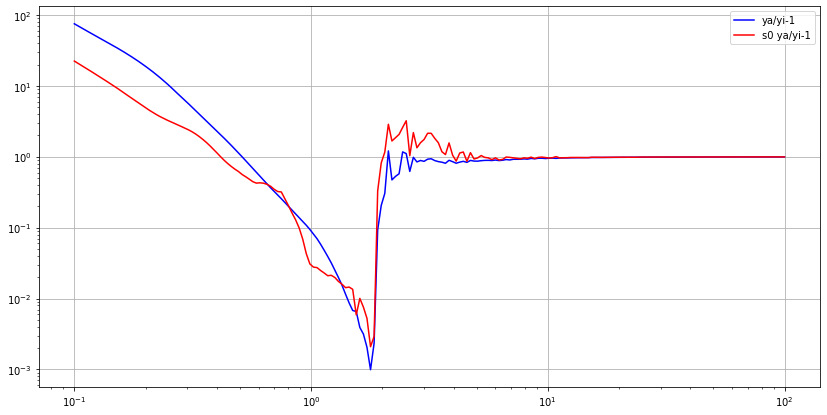

In [11]:
l0_a = []
f0_a = []
g0_a = []

for l in np.geomspace (1.0e-1, 1.0e2, 200):
    interp.set_over_smooth (l)
    interp.prepare_interp (Ncm.Vector.new_array (y_a))
    yi_a = []
    ya_a = []
    yi_b = []

    for x in x_a:
        mset.fparams_set_array (x)
        fdata.prepare (mset)
        yi_a.append (interp.eval_m2lnp (Ncm.Vector.new_array (x)))
        ya_a.append (fdata.m2lnL_val (mset))

    yi_a = np.array (yi_a)
    ya_a = np.array (ya_a)

    m = -np.average (yi_a - ya_a, weights = 1.0 / ya_a**2)
    diff = (yi_a + m) / ya_a - 1.0
    diff2 = (yi_a + m) - ya_a
    
    l0_a.append (l)
    f0_a.append (np.sqrt (np.sum (diff2**2)/len(diff2)))
    g0_a.append (np.sqrt (np.sum (diff **2)/len(diff )))


plt.figure (figsize=(14, 7))
plt.plot (l_a, g_a, 'b-', label='ya/yi-1')
plt.plot (l0_a, g0_a, 'r-', label='s0 ya/yi-1')
plt.legend(loc='best')
plt.grid()

plt.xscale ('log')
plt.yscale ('log')
